In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
ls "/content/drive/My Drive"

 2to1/                  Corpus.xlsx            test1.txt
 agnoag.xlsx           'Getting started.pdf'   Unclassified.xlsx
'Colab Notebooks'/      predictions.xlsx       Yelp_Data/
 corpus_shuffled.xlsx   shuffled.xlsx


In [0]:
import pandas as pd
path = '/content/drive/My Drive/'
corpus1 = pd.read_excel(path + 'agnoag.xlsx') 



In [0]:
import pandas as pd
type(corpus1)
corpus1.shape
corpus = pd.DataFrame(corpus1)
corpus.head(10)
#type(corpus)

,text,label
0,The plan aims to make American agriculture the...,1
1,Prime Minister Narendra Modi wants more privat...,1
2,A truly agriculture and rural development-focu...,1
3,It has been noted that the NDA-3 government's ...,1
4,CHANDIGARH: Haryana agriculture and farmers' w...,1
5,Prime Minister Narendra Modi's poll promise of...,1
6,"The new model of economic reforms, commonly kn...",1
7,"Farmers in India, despite being a major part o...",1
8,Key challenges\n\n\n\nDoubling farmers' income...,1
9,The Narendra Modi government's first Budget in...,1


In [0]:
from sklearn.utils import shuffle
corpus_shuff = shuffle(corpus)
corpus_shuff.head(10)
corpus_shuff.to_excel(r'/content/drive/My Drive/corpus_shuffled.xlsx')

In [0]:
import numpy as np

corpus1 =np.asarray(corpus)
corpus2= np.random.shuffle(corpus1)



In [0]:

text = corpus['text']
labels = corpus['label']

#from keras.utils import to_categorical


In [0]:
!pip install tensorflow==2.0.0-beta0
import tensorflow as tf
print(tf.__version__)


2.0.0-beta0


In [0]:
# hyper 

vocab_size = 3000
embedding_dim = 64
max_length = 300 # 86%
trunc_type='post' # ok 
padding_type='post' # ok
oov_tok = "<OOV>"
training_size = 1600

In [0]:
training_text = text[0:training_size]
testing_text = text[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_text)

word_index = tokenizer.word_index

In [0]:
training_text.shape

(1600,)

In [0]:
training_sequences = tokenizer.texts_to_sequences(training_text)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_padded.shape

(1600, 300)

In [0]:
testing_sequences = tokenizer.texts_to_sequences(testing_text)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 64)           192000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 296, 128)          41088     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 241,409
Trainable params: 241,409
Non-trainable params: 0
_________________________________________________________________


In [0]:
# format - history (x,y, other things...) x is training data, y is labels 
num_epochs =20
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Train on 1600 samples, validate on 920 samples
Epoch 1/20
1600/1600 [==============================] - 4s 3ms/sample - loss: 0.6479 - accuracy: 0.6250 - val_loss: 0.8970 - val_accuracy: 0.0000e+00
Epoch 2/20
1600/1600 [==============================] - 4s 3ms/sample - loss: 0.4710 - accuracy: 0.7875 - val_loss: 0.4967 - val_accuracy: 0.8413
Epoch 3/20
1600/1600 [==============================] - 4s 3ms/sample - loss: 0.3136 - accuracy: 0.8706 - val_loss: 0.2744 - val_accuracy: 0.8848
Epoch 4/20
1600/1600 [==============================] - 4s 3ms/sample - loss: 0.1917 - accuracy: 0.9300 - val_loss: 0.2968 - val_accuracy: 0.8913
Epoch 5/20
1600/1600 [==============================] - 4s 3ms/sample - loss: 0.0892 - accuracy: 0.9825 - val_loss: 0.4618 - val_accuracy: 0.8587
Epoch 6/20
1600/1600 [==============================] - 4s 3ms/sample - loss: 0.0315 - accuracy: 0.9981 - val_loss: 0.6222 - val_accuracy: 0.8424
Epoch 7/20
1600/1600 [==============================] - 4s 3ms/sample - l

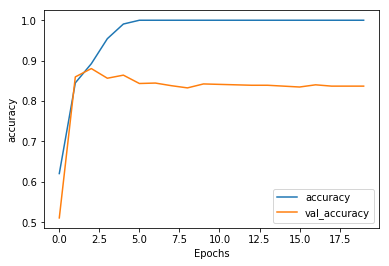

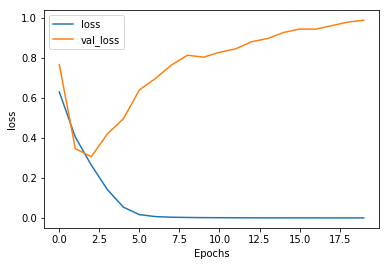

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [0]:
job_text1= pd.read_excel(path + 'Unclassified.xlsx') 
job_text=job_text1.sample(frac=1) 

text = job_text['Text']


job_sequences = tokenizer.texts_to_sequences(text)
job_padded = pad_sequences(job_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


#training_test.shape # (1600,) here shape is (1600,) but in our data shape is (1332,1)
training_sequences = tokenizer.texts_to_sequences(training_text)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_padded.shape


(1600, 300)

In [0]:
import numpy as np 
#job_text1.shape # ok (1332,1) 
#job_text.shape # ok (1332,1) 
### job_text # is a column of string but after tokenizign it should give a matrix  
Xnew = np.asarray(job_padded)


In [0]:

ynew = model.predict_classes(Xnew)

df_ynew =pd.DataFrame(ynew)
# show the inputs and predicted outputs
#for i in range(len(Xnew)):
	#print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

In [0]:
df1 = pd.DataFrame(job_text, columns=['Text'])
df2 = pd.DataFrame(ynew, columns=['Label'])

#df2
final = pd.concat([df1, df2], axis=1)

#final

In [0]:
final.to_excel(r'/content/drive/My Drive/predictions.xlsx')

In [0]:
import io
sequences = tokenizer.texts_to_sequences(training_text)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

e = model.layers[0]
weights = e.get_weights()[0]


reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_text[1])



out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

prime minister narendra modi wants more private investment in agriculture but it is already <OOV> on private investment once again while speaking during the <OOV> of thanks on the <OOV> speech prime minister narendra modi made it clear in the lok sabha that agriculture would be his government's top priority agriculture is the <OOV> of our economy  he said his <OOV> is right and the <OOV> has come at the right time even though more and more people are <OOV> farming it continues to <OOV> most in the country agriculture still accounts for a <OOV> of rural consumption that eventually contributes to the country's overall consumption level his <OOV> are also <OOV> on but we have to leave our old ways and <OOV> things like micro irrigation we have to bring down inputs costs we have to hold the hands of our farmers  farmers have been <OOV> with inadequate returns on their produce and it is due to various reasons an important reason being the rising cost of inputs bringing down <OOV> finally 

In [0]:

try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')